# 第8章 特殊な加工・可視化を行う10本ノック

In [106]:
using CSV
using DataFrames
using DataFramesMeta
using JSON
using HTTP
using YAML
using TOML
using PlotlyJS

## 91

In [2]:
ifn = "../../data/chapter-8/data/person_count_out_0001_2021011509.csv"
if !isfile(ifn)
    throw(error())
end
df = CSV.read(ifn, DataFrame)

Row,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
,Int64,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
2,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
3,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
4,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
5,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0
6,5,1,2021-01-15 09:00:05.207,2,508,73,0,73,508,0
7,6,1,2021-01-15 09:00:06.222,2,508,73,0,73,508,0
8,7,1,2021-01-15 09:00:07.238,2,508,73,0,73,508,0
9,8,1,2021-01-15 09:00:08.253,2,508,73,0,73,508,0


In [3]:
df = CSV.read(ifn, DataFrame; limit=500)

Row,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
,Int64,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
2,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
3,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
4,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
5,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0
6,5,1,2021-01-15 09:00:05.207,2,508,73,0,73,508,0
7,6,1,2021-01-15 09:00:06.222,2,508,73,0,73,508,0
8,7,1,2021-01-15 09:00:07.238,2,508,73,0,73,508,0
9,8,1,2021-01-15 09:00:08.253,2,508,73,0,73,508,0


In [12]:
chunks = CSV.Chunks(ifn;)

CSV.Chunks(CSV.Context(false, "../../data/chapter-8/data/person_count_out_0001_2021011509.csv", [:id, :place, :receive_time, :sensor_num, :in1, :out1, :state1, :in2, :out2, :state2], 3627, 10, UInt8[0x69, 0x64, 0x2c, 0x70, 0x6c, 0x61, 0x63, 0x65, 0x2c, 0x72  …  0x35, 0x36, 0x2c, 0x37, 0x38, 0x32, 0x2c, 0x30, 0x0d, 0x0a], 67, 197550, 2, Parsers.Options(Parsers.Flags(spacedelim=false, tabdelim=false, stripquoted=false, stripwhitespace=false, checkquoted=true, checksentinel=true, checkdelim=true, ignorerepeated=false, ignoreemptylines=true), 0x2e, Parsers.Token(0x22), Parsers.Token(0x22), 0x22, Parsers.Token[], Parsers.Token(0x2c), Parsers.Token(""), ["true", "True", "TRUE", "T", "1"], ["false", "False", "FALSE", "F", "0"], nothing, nothing), CSV.Column[CSV.Column(Int64, false, false, false, (0.2, 500), false, #undef, ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 140045

In [13]:
df = DataFrame()
for chunk_i in chunks
    tmp_df = DataFrame(chunk_i)
    append!(df, tmp_df)
end

In [14]:
df

Row,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
,Int64,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
2,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
3,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
4,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
5,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0
6,5,1,2021-01-15 09:00:05.207,2,508,73,0,73,508,0
7,6,1,2021-01-15 09:00:06.222,2,508,73,0,73,508,0
8,7,1,2021-01-15 09:00:07.238,2,508,73,0,73,508,0
9,8,1,2021-01-15 09:00:08.253,2,508,73,0,73,508,0


## 92

In [57]:
ifn = "../../data/chapter-8/data/column_oriented.json"
if !isfile(ifn)
    throw(error())
end
d = JSON.parse(read(ifn, String))
nd = Dict()
for k in keys(d)
    l = []
    for i in values(d[k])
        append!(l, i)
    end
    nd[k] = l
end
DataFrame(nd)

Row,id,value
,Any,Any
1,2,10
2,1,1
3,3,100


In [68]:
ifn = "../../data/chapter-8/data/index_oriented.json"
if !isfile(ifn)
    throw(error())
end
d = JSON.parse(read(ifn, String))
df = DataFrame()
for k in keys(d)
    append!(df, DataFrame(d[k]))
end
df

Row,id,value
,Int64,Int64
1,2,10
2,1,1
3,3,100


In [74]:
ifn = "../../data/chapter-8/data/table_oriented.json"
if !isfile(ifn)
    throw(error())
end
d = JSON.parse(read(ifn, String))
df = DataFrame(d["data"])
select(df, Not(:index))

Row,id,value
,Int64,Int64
1,1,1
2,2,10
3,3,100


## 93

In [86]:
response = HTTP.get("https://worldtimeapi.org/api/timezone/Asia/Tokyo")

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
access-control-allow-credentials: true
access-control-allow-origin: *
cache-control: max-age=0, private, must-revalidate
content-encoding: gzip
content-type: application/json; charset=utf-8
cross-origin-window-policy: deny
date: Fri, 10 Mar 2023 10:10:49 GMT
server: Fly/90d459b3 (2023-03-07)
x-content-type-options: nosniff
x-download-options: noopen
x-frame-options: SAMEORIGIN
x-permitted-cross-domain-policies: none
x-request-id: F0sHD8w4OTwPiI2fKEoh
x-runtime: 327µs
x-xss-protection: 1; mode=block
transfer-encoding: chunked
via: 1.1 fly.io
fly-request-id: 01GV5G0XHXBWH5J3DF8MXCT331-nrt

{"abbreviation":"JST","client_ip":"133.106.39.29","datetime":"2023-03-10T19:10:50.558530+09:00","day_of_week":5,"day_of_year":69,"dst":false,"dst_from":null,"dst_offset":0,"dst_until":null,"raw_offset":32400,"timezone":"Asia/Tokyo","unixtime":1678443050,"utc_datetime":"2023-03-10T10:10:50.558530+00:00","utc_offset":"+09:00","week_number":10}"""

In [87]:
j = JSON.parse(String(response.body))

Dict{String, Any} with 15 entries:
  "unixtime"     => 1678443050
  "utc_offset"   => "+09:00"
  "timezone"     => "Asia/Tokyo"
  "dst_until"    => nothing
  "raw_offset"   => 32400
  "dst_from"     => nothing
  "datetime"     => "2023-03-10T19:10:50.558530+09:00"
  "client_ip"    => "133.106.39.29"
  "dst"          => false
  "abbreviation" => "JST"
  "day_of_week"  => 5
  "dst_offset"   => 0
  "utc_datetime" => "2023-03-10T10:10:50.558530+00:00"
  "day_of_year"  => 69
  "week_number"  => 10

In [88]:
DataFrame(j)

Row,abbreviation,client_ip,datetime,day_of_week,day_of_year,dst,dst_from,dst_offset,dst_until,raw_offset,timezone,unixtime,utc_datetime,utc_offset,week_number
,String,String,String,Int64,Int64,Bool,Nothing,Int64,Nothing,Int64,String,Int64,String,String,Int64
1,JST,133.106.39.29,2023-03-10T19:10:50.558530+09:00,5,69,false,,0,,32400,Asia/Tokyo,1678443050,2023-03-10T10:10:50.558530+00:00,+09:00,10


In [90]:
open("./time.json", "w") do f
    JSON.print(f, j)
end

In [94]:
for _ in 1:4
    response = HTTP.get("https://worldtimeapi.org/api/timezone/Asia/Tokyo")
    j = JSON.parse(String(response.body))
    open("./time2.json", "a") do f
        JSON.print(f, j)
    end
    sleep(1)
end

## 94

In [98]:
ifn = "../../data/chapter-8/config.yml"
if !isfile(ifn)
    throw(error())
end

In [101]:
YAML.load(String(read(ifn)))

Dict{Any, Any} with 2 entries:
  "dataset" => Dict{Any, Any}("name"=>"pseudo", "path"=>"data/images_by_py/")
  "use_gpu" => true

In [103]:
ifn = "../../data/chapter-8/config.toml"
if !isfile(ifn)
    throw(error())
end

In [105]:
TOML.parse(String(read(ifn)))

Dict{String, Any} with 2 entries:
  "dataset" => Dict{String, Any}("name"=>"pseudo", "path"=>"data/images_by_py/")
  "use_gpu" => true

## 95

## 96

## 97

## 98

## 99

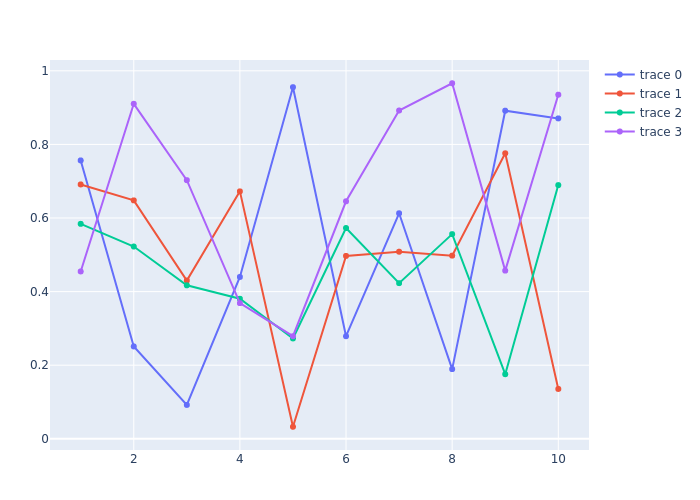

In [107]:
p = plot(rand(10, 4))

## 100